In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.shape

(2200, 8)

In [4]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<AxesSubplot:>

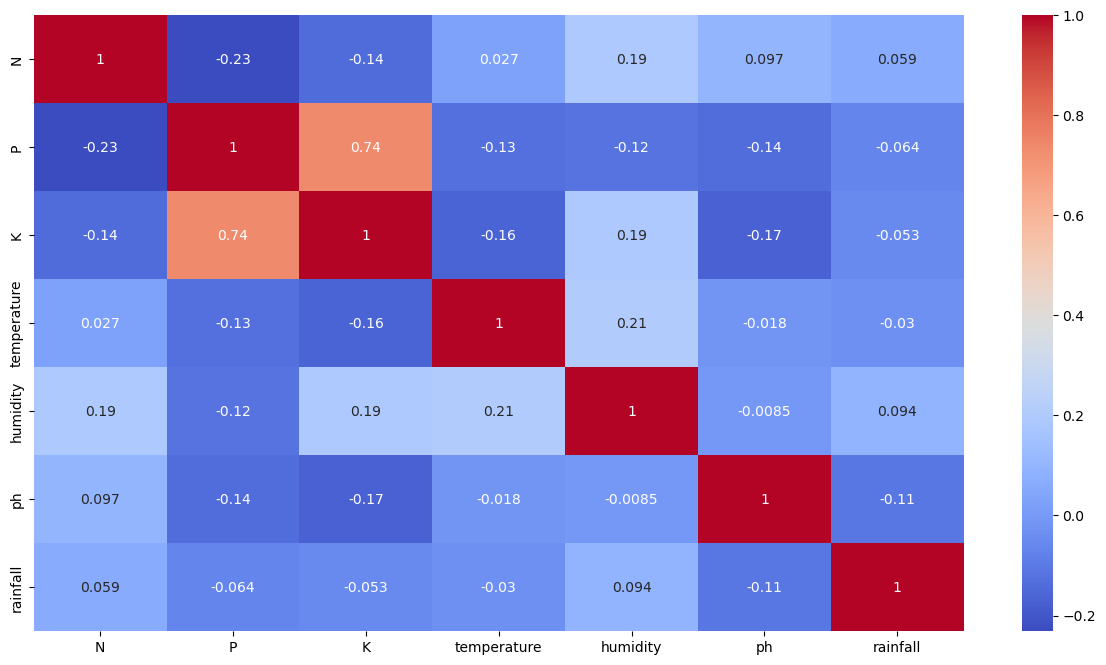

In [7]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [8]:
features = ['N', 'P', 'temperature', 'humidity', 'ph']
X = df.drop(columns=['label'])[features]
X

,N,P,temperature,humidity,ph
0,90,42,20.879744,82.002744,6.502985
1,85,58,21.770462,80.319644,7.038096
2,60,55,23.004459,82.320763,7.840207
3,74,35,26.491096,80.158363,6.980401
4,78,42,20.130175,81.604873,7.628473
...,...,...,...,...,...
2195,107,34,26.774637,66.413269,6.780064
2196,99,15,27.417112,56.636362,6.086922
2197,118,33,24.131797,67.225123,6.362608
2198,117,32,26.272418,52.127394,6.758793


In [9]:
y = df[['label']]

In [10]:
X.shape, y.shape

((2200, 5), (2200, 1))

In [11]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(sparse_output=False, dtype='int')
# encoded_y = ohe.fit_transform(y)
# encoded_y

In [12]:
# columns = ohe.get_feature_names_out()
# y = pd.DataFrame(encoded_y, columns=columns)
# y

In [13]:
y.shape

(2200, 1)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/Users/myothiha/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [33]:
X_train.shape, X_test.shape

((1760, 5), (440, 5))

In [34]:
y_train.shape, y_test.shape

((1760,), (440,))

In [35]:
# ##Baselines
# from sklearn.linear_model import LogisticRegression  #drawing a line based on linear regression but used for classification


# lr = LogisticRegression(random_state=999, multi_class='multinomial')

# lr.fit(X_train, y_train)

/Users/myothiha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=999)

In [40]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    # 'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    # Add other classifiers as needed
}

for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5)  # Adjust cv value as needed
    print(f"{clf_name}: Accuracy {np.mean(scores)} (+/- {np.std(scores)})")


best_classifier_name = max(classifiers, key=lambda k: np.mean(cross_val_score(classifiers[k], X_train, y_train, cv=5)))
model = classifiers[best_classifier_name]
print(f"The best classifier is {best_classifier_name}.")

Random Forest: Accuracy 0.9392045454545455 (+/- 0.015203509273022315)
Support Vector Machine: Accuracy 0.7960227272727273 (+/- 0.01337341169993162)
K-Nearest Neighbors: Accuracy 0.8460227272727273 (+/- 0.014530354377891396)
XGBoost: Accuracy 0.9210227272727274 (+/- 0.015182260472599306)
The best classifier is Random Forest.


In [41]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
yhat = model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.80      0.87      0.83        23
           9       1.00      1.00      1.00        20
          10       0.73      1.00      0.85        11
          11       0.95      0.86      0.90        21
          12       0.90      1.00      0.95        19
          13       1.00      0.79      0.88        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       0.73      0.79      0.76        14
          17       1.00    